# EN ESTA NOTEBOOK SE IMPLEMENTARÁN LOS ALGORITMOS DE INTELIGENCIA ARTIFICIAL SUPERVISADOS Y SE EVALUARÁN LOS RESULTADOS PARA EL PROYECTO




## ARBOLES DE DECISIÓN

In [45]:
#importanción de librerías a utilizar

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#ARBOL DE DECISIÓN
from sklearn.tree import DecisionTreeClassifier   #usqar arbol de decision
from sklearn.model_selection import train_test_split    #permite dividir dataset
from sklearn.metrics import accuracy_score  
from sklearn.preprocessing import StandardScaler #  librería para escalar las variables independientes


In [46]:
# IMPORTACIÓN DEL DATASET REDUCIDO LUEGO DEL PROCESAMIENTO DE COLUMNAS

df = pd.read_csv('friesgo_2018_reduc.csv',  sep=',', encoding='utf-8')

df.head(5)

,id,region,tamanio_aglomerado,tipo_vivienda,obtiene_gas,obtiene_agua,baño,cant_componentes,tipo_hogar,ingresos,...,altura_cm,considera_su_alimentacion,promedio_fv_diario,consumo_5porc_fv,colesterol_alto,consumido_alcohol,consumo_regular_riesgo,dijeron_diabetes,familiares_directos_diabetes,familiares_no_directos_diabetes
0,1128639,1,1,3,1,1,1,2,2,50000,...,181.0,2,4.00,2,2,1,2.0,2,2,2
1,1709939,1,1,1,1,1,1,3,4,40000,...,160.0,2,6.43,1,1,1,2.0,2,2,2
2,6874130,1,1,3,1,1,1,2,2,40000,...,160.0,2,2.86,2,2,1,2.0,2,2,2
3,10319375,1,1,3,4,1,1,1,1,80000,...,155.0,2,1.43,2,1,1,2.0,2,2,1
4,11140857,1,1,3,1,1,1,2,8,30000,...,178.0,2,1.43,2,2,1,2.0,2,2,99


In [47]:
df.columns

Index(['id', 'region', 'tamanio_aglomerado', 'tipo_vivienda', 'obtiene_gas',
       'obtiene_agua', 'baño', 'cant_componentes', 'tipo_hogar', 'ingresos',
       'asignaciones', 'sexo', 'edad', 'situacion_conyugal',
       'nivel_instruccion', 'cobertura_salud_nueva', 'ansiedad_depresion',
       'af_intensa_veces_por_semana', 'af_intensa_min_totales_por_semana',
       'af_intensa_min_totales_por_semana_nsnc',
       'af_moderada_veces_por_semana', 'af_moderada_min_totales_por_semana',
       'actividad_fisica_moderada_min_totales_por_semana_nsnc',
       'caminata_veces_por_semana', 'caminata_min_totales_por_semana',
       'caminata_min_totales_por_semana_nsnc', 'tiempo_sentado_min_por_dia',
       'tiempo_sentado_min_por_dia_nsnc',
       'razon_ninguna_actividad_la_ultima_semana',
       'razon_poca_actividad_la_ultima_semana', 'af_fue_actividad_domestica',
       'af_fue_actividad_laboral', 'af_fue_traslado', 'af_fue_deporte',
       'nivel_actividad_fisica', 'barreras_actividad_f

In [48]:
#muevo columnas de variables dependiendtes al final

cols_to_move = [ 'veces_presion_alta', 'colesterol_alto', 'dijeron_diabetes']

df = df[[col for col in df if col not in cols_to_move] + cols_to_move]

print (df.iloc[:,-4:-1]) 

       familiares_no_directos_diabetes  veces_presion_alta  colesterol_alto
0                                    2                   3                2
1                                    2                   3                1
2                                    2                   3                2
3                                    1                   3                1
4                                   99                   3                2
...                                ...                 ...              ...
26193                                1                   3                2
26194                                2                   2                1
26195                                2                   2                1
26196                                1                   3                2
26197                               99                   2                2

[26198 rows x 3 columns]


In [49]:
# Lista de las regiones únicas
regiones = df['region'].unique()
print(regiones)

[1 2 3 4 5 6]


In [50]:
# Crear un diccionario para almacenar los DataFrames por región
dfs_por_region = {}


In [51]:
# Iterar sobre cada región y guardar un nuevo DF por cada una

for region in regiones:
    # Filtrar los datos por la región actual
    df_region = df[df['region'] == region]
    # Guardar el DataFrame en el diccionario usando la región como clave
    dfs_por_region[region] = df_region


In [52]:
# Crear diccionarios para almacenar modelos y resultados por región
modelos_por_region = {}
resultados_por_region = {}
importancia_por_region = {}

# Iterar sobre cada región para entrenar y evaluar modelos
for region in regiones:
    # Obtener el DataFrame de la región actual
    df_region = dfs_por_region[region]
    
    # Variables independientes
    X_region = df_region.iloc[:, 1:-3]  # Todas las columnas menos las últimas tres y la primera (id)
    
    # Variables dependientes
    y_region_colesterol = df_region['colesterol_alto']
    y_region_diabetes = df_region['dijeron_diabetes']
    y_region_hipertension = df_region['veces_presion_alta']

    # Dividir los datos en conjuntos de entrenamiento y prueba para cada enfermedad
    X_train_col, X_test_col, y_train_col, y_test_col = train_test_split(X_region, y_region_colesterol, test_size=0.25, random_state=0)
    X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X_region, y_region_diabetes, test_size=0.25, random_state=0)
    X_train_hip, X_test_hip, y_train_hip, y_test_hip = train_test_split(X_region, y_region_hipertension, test_size=0.25, random_state=0)
    
    # Crear y entrenar el modelo de árbol de decisión para cada enfermedad
    clf_col = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=4)
    clf_col.fit(X_train_col, y_train_col)
    
    clf_dia = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=4)
    clf_dia.fit(X_train_dia, y_train_dia)
    
    clf_hip = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=4)
    clf_hip.fit(X_train_hip, y_train_hip)
    
    # Probar modelo con conjunto de prueba
    y_pred_col = clf_col.predict(X_test_col)
    y_pred_dia = clf_dia.predict(X_test_dia)
    y_pred_hip = clf_hip.predict(X_test_hip)
    
    # Exactitud
    acc_col = accuracy_score(y_test_col, y_pred_col)
    acc_dia = accuracy_score(y_test_dia, y_pred_dia)
    acc_hip = accuracy_score(y_test_hip, y_pred_hip)
    
    #importancia de cada columna
    importances_col = clf_col.feature_importances_
    importances_dia = clf_dia.feature_importances_
    importances_hip = clf_hip.feature_importances_
    
    
    # Almacenar los modelos y sus resultados por región
    modelos_por_region[region] = {
        'colesterol': clf_col,
        'diabetes': clf_dia,
        'hipertension': clf_hip
    }
    
    resultados_por_region[region] = {
        'colesterol': acc_col,
        'diabetes': acc_dia,
        'hipertension': acc_hip
    }
    
    importancia_por_region[region]={
        'colesterol': importances_col,
        'diabetes': importances_dia,
        'hipertension': importances_hip  
    }
  

  ## IMPRIMIMOS EXACTITUD POR CADA MODELO

In [53]:
region_dict = {
    1: 'Metropolitana',
    2: 'Pampeana',
    3: 'Noroeste',
    4: 'Noreste',
    5: 'Cuyo',
    6: 'Patagónica'
}

In [54]:
# Mostrar los resultados
for region, resultados in resultados_por_region.items():
    nombre_region = region_dict.get(region, f"Región {region}")
    print(f"Región: {nombre_region}")
    print(f"Exactitud del modelo para colesterol: {resultados['colesterol']:.4f}")
    print(f"Exactitud del modelo para diabetes: {resultados['diabetes']:.4f}")
    print(f"Exactitud del modelo para hipertensión: {resultados['hipertension']:.4f}\n")

Región: Metropolitana
Exactitud del modelo para colesterol: 0.7479
Exactitud del modelo para diabetes: 0.8545
Exactitud del modelo para hipertensión: 0.6412

Región: Pampeana
Exactitud del modelo para colesterol: 0.7700
Exactitud del modelo para diabetes: 0.8589
Exactitud del modelo para hipertensión: 0.6646

Región: Noroeste
Exactitud del modelo para colesterol: 0.7660
Exactitud del modelo para diabetes: 0.8779
Exactitud del modelo para hipertensión: 0.6650

Región: Noreste
Exactitud del modelo para colesterol: 0.8025
Exactitud del modelo para diabetes: 0.8605
Exactitud del modelo para hipertensión: 0.6417

Región: Cuyo
Exactitud del modelo para colesterol: 0.7517
Exactitud del modelo para diabetes: 0.8383
Exactitud del modelo para hipertensión: 0.6300

Región: Patagónica
Exactitud del modelo para colesterol: 0.7456
Exactitud del modelo para diabetes: 0.8417
Exactitud del modelo para hipertensión: 0.6670



 ## IMPRIMIMOS IMPORTANCIA DE CADA COLUMNA

### COLESTEROL

In [86]:

# Crear un DataFrame vacío para almacenar las importancias
importancias_colesterol_df = pd.DataFrame(columns=['Region', 'Variable', 'Importancia'])


for region, importancias in importancia_por_region.items():
    # Obtener la importancia de colesterol de la región actual
    importances_col = importancias['colesterol']
    
    # Obtener el DataFrame de la región actual para obtener los nombres de las columnas
    df_region = dfs_por_region[region]
    X_region = df_region.iloc[:, 1:-3]
    columnas_originales = X_region.columns
    
    # Ordenar los índices de las importancias de mayor a menor
    indices_ordenados = np.argsort(importances_col)[::-1]
    
    # Obtener el nombre de la región
    nombre_region = region_dict.get(region, f"Región {region}")
    
    # Imprimir los resultados
    print(f"Región: {nombre_region}")
    for i in indices_ordenados:
        if importances_col[i] > 0.05:  # solo imprimo columnas con importancia mayor a 0
                                 
            print(f"{columnas_originales[i]}: {importances_col[i]:.4f}")
            
            importancias_colesterol_df = importancias_colesterol_df.append({
                'Region': nombre_region,
                'Variable': columnas_originales[i],
                'Importancia': importances_col[i]     
            }, ignore_index=True)
            
    print("\n")    
    
    

Región: Metropolitana
edad: 0.5271
profesional_indica_sobrepeso: 0.1337
peso_kg: 0.0896
sexo: 0.0880
altura_cm: 0.0691


Región: Pampeana
edad: 0.5684
profesional_indica_sobrepeso: 0.2467


Región: Noroeste
edad: 0.4633
profesional_indica_sobrepeso: 0.3053
razon_poca_actividad_la_ultima_semana: 0.0593


Región: Noreste
edad: 0.4969
profesional_indica_sobrepeso: 0.3060


Región: Cuyo
edad: 0.4714
profesional_indica_sobrepeso: 0.2137
ingresos: 0.0734


Región: Patagónica
edad: 0.5516
profesional_indica_sobrepeso: 0.2129
ingresos: 0.0664
tiempo_sentado_min_por_dia: 0.0517




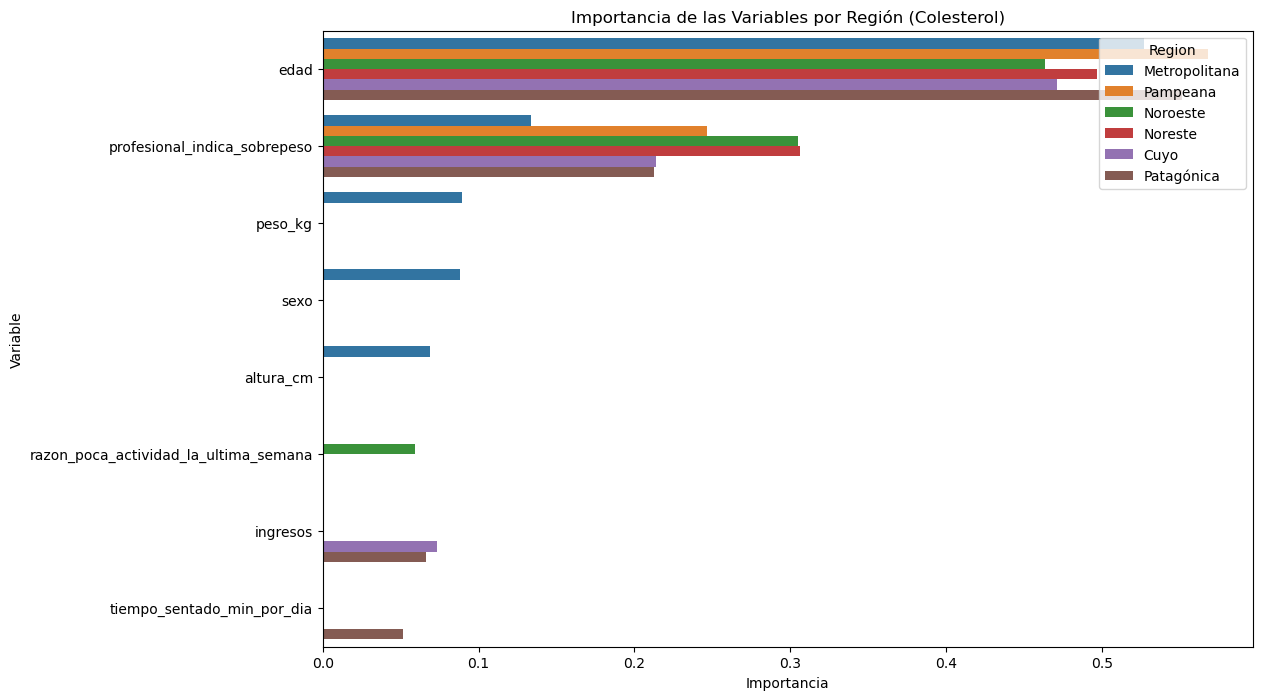

In [87]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', hue='Region', data=importancias_colesterol_df)
plt.title('Importancia de las Variables por Región (Colesterol)')
plt.show()

### HIPERTENSIÓN

In [88]:

# Crear un DataFrame vacío para almacenar las importancias
importancias_hipertension_df = pd.DataFrame(columns=['Region', 'Variable', 'Importancia'])


for region, importancias in importancia_por_region.items():
    # Obtener la importancia de colesterol de la región actual
    importances_hip = importancias['hipertension']
    
    # Obtener el DataFrame de la región actual para obtener los nombres de las columnas
    df_region = dfs_por_region[region]
    X_region = df_region.iloc[:, 1:-3]
    columnas_originales = X_region.columns
    
    # Ordenar los índices de las importancias de mayor a menor
    indices_ordenados = np.argsort(importances_hip)[::-1]
    
    # Obtener el nombre de la región
    nombre_region = region_dict.get(region, f"Región {region}")
    
    # Imprimir los resultados
    print(f"Región: {nombre_region}")
    for i in indices_ordenados:
        if importances_hip[i] > 0.05:  # solo imprimo columnas con importancia mayor a 0
                    
            print(f"{columnas_originales[i]}: {importances_hip[i]:.4f}")
            
            importancias_hipertension_df = importancias_hipertension_df.append({
                'Region': nombre_region,
                'Variable': columnas_originales[i],
                'Importancia': importances_hip[i]     
            }, ignore_index=True)
            
    print("\n") 






Región: Metropolitana
edad: 0.5492
peso_kg: 0.2000
nivel_instruccion: 0.0683


Región: Pampeana
edad: 0.6758
profesional_indica_sobrepeso: 0.1581


Región: Noroeste
edad: 0.6518
profesional_indica_sobrepeso: 0.1445


Región: Noreste
edad: 0.6737
profesional_indica_sobrepeso: 0.1992


Región: Cuyo
edad: 0.5603
profesional_indica_sobrepeso: 0.1805
peso_kg: 0.1052


Región: Patagónica
edad: 0.5707
profesional_indica_sobrepeso: 0.1299
peso_kg: 0.1266




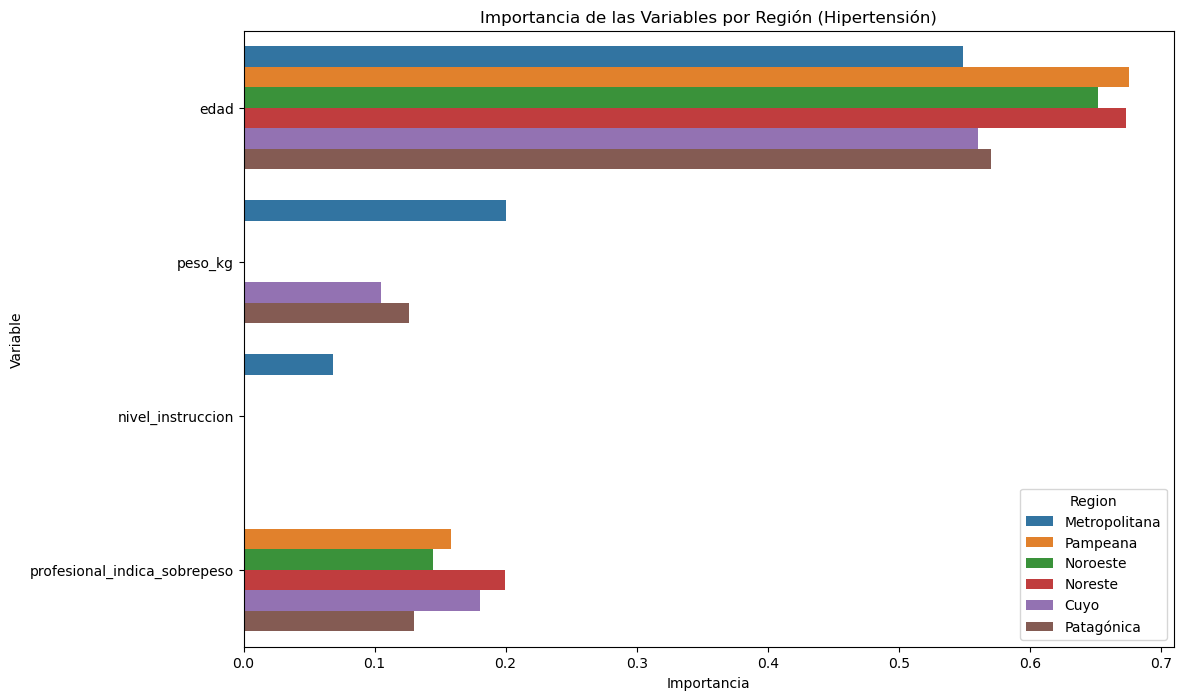

In [89]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', hue='Region', data=importancias_hipertension_df)
plt.title('Importancia de las Variables por Región (Hipertensión)')
plt.show()

### DIABETES

In [90]:

# Crear un DataFrame vacío para almacenar las importancias
importancias_diabetes_df = pd.DataFrame(columns=['Region', 'Variable', 'Importancia'])

for region, importancias in importancia_por_region.items():
    # Obtener la importancia de colesterol de la región actual
    importances_dia = importancias['diabetes']
    
    # Obtener el DataFrame de la región actual para obtener los nombres de las columnas
    df_region = dfs_por_region[region]
    X_region = df_region.iloc[:, 1:-3]
    columnas_originales = X_region.columns
    
    # Ordenar los índices de las importancias de mayor a menor
    indices_ordenados = np.argsort(importances_dia)[::-1]
    
    # Obtener el nombre de la región
    nombre_region = region_dict.get(region, f"Región {region}")
    
   
    
    # Imprimir los resultados
    print(f"Región: {nombre_region}")
    for i in indices_ordenados:
        if importances_dia[i] > 0.05:  # solo imprimo columnas con importancia mayor a 0
            print(f"{columnas_originales[i]}: {importances_dia[i]:.4f}")
            
            importancias_diabetes_df = importancias_diabetes_df.append({
                'Region': nombre_region,
                'Variable': columnas_originales[i],
                'Importancia': importances_dia[i]     
            }, ignore_index=True)
    print("\n")


Región: Metropolitana
edad: 0.2766
familiares_directos_diabetes: 0.1991
profesional_indica_sobrepeso: 0.1224
familiares_no_directos_diabetes: 0.0727
caminata_veces_por_semana: 0.0548
af_intensa_min_totales_por_semana: 0.0535


Región: Pampeana
profesional_indica_sobrepeso: 0.3349
edad: 0.2477
familiares_directos_diabetes: 0.2308
altura_cm: 0.0774


Región: Noroeste
profesional_indica_sobrepeso: 0.3234
edad: 0.2949
familiares_directos_diabetes: 0.2039


Región: Noreste
edad: 0.3707
familiares_directos_diabetes: 0.3336
peso_kg: 0.0877


Región: Cuyo
profesional_indica_sobrepeso: 0.2483
edad: 0.2265
familiares_directos_diabetes: 0.1028
altura_cm: 0.0822
consumido_alcohol: 0.0625
af_moderada_min_totales_por_semana: 0.0573
af_intensa_min_totales_por_semana: 0.0535


Región: Patagónica
edad: 0.3267
familiares_directos_diabetes: 0.1517
familiares_no_directos_diabetes: 0.0791
af_moderada_min_totales_por_semana: 0.0771
profesional_indica_sobrepeso: 0.0763
nivel_instruccion: 0.0625
cant_componen

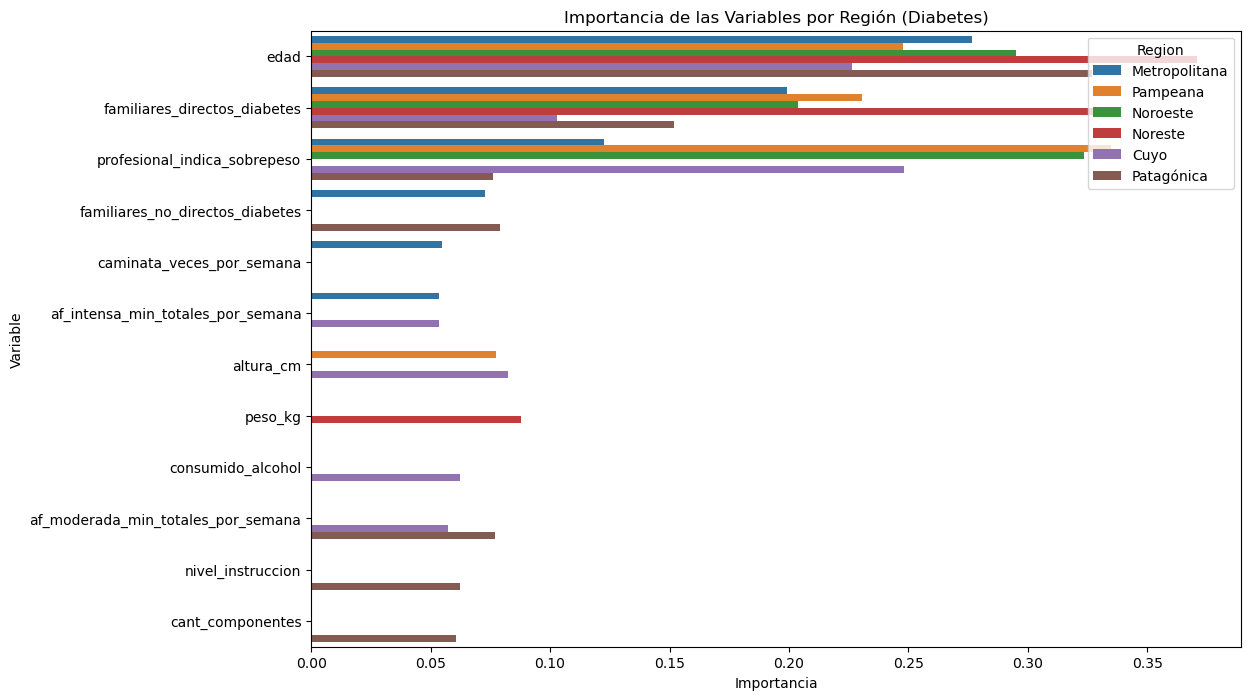

In [91]:

plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', hue='Region', data=importancias_diabetes_df)
plt.title('Importancia de las Variables por Región (Diabetes)')
plt.show()